In [264]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt
from copy import deepcopy
from random import randint
import pandas as pd
import numpy as np

In [265]:
breast_df = pd.read_csv('./data/wdbc.data', header=None)
breast_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data preprocess

In [266]:
# breast_df = breast_df[breast_df[6] != '?'].astype({6: 'int32'})
breast_df.drop(columns=[0], inplace=True)
breast_df.replace({1: {'M': 0, 'B': 1}}, inplace=True)
breast_df.rename(columns={1: 'diagnosis'}, inplace=True)
breast_df

/tmp/ipykernel_4960/2354300729.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_df.replace({1: {'M': 0, 'B': 1}}, inplace=True)


,diagnosis,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Train test split

In [267]:
X = breast_df[breast_df.columns.drop('diagnosis')].to_numpy()
y = breast_df['diagnosis'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Base Classifier

In [268]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Base model score is: {score}")

Base model score is: 0.956140350877193


In [269]:
X.shape

(569, 30)

### Introducing missing values

In [270]:
missing_coefs = [0, 0.01, 0.05, 0.1]

def introduce_missing_values(data, missing_coef):
    data_copy = deepcopy(data)
    
    all_data = data_copy.shape[0] * data_copy.shape[1]

    missing_values = set()
    n_missing = round(missing_coef * all_data)

    while len(missing_values) != n_missing:
        
        x_random = randint(0, data_copy.shape[0]-1)
        y_random = randint(0, data_copy.shape[1]-1)
        
        missing_values.add((x_random, y_random))
        data_copy[x_random, y_random] = np.nan
    
    return data_copy


## Experiments

### Without data imputation

In [271]:
datasets = [introduce_missing_values(X, coef) for coef in missing_coefs]

In [272]:
# check if values are removed correctly
for data in datasets:
    print(np.count_nonzero(~np.isnan(data)))
    

17070
16899
16216
15363


In [273]:
scores = []

for X, coef in zip(datasets, missing_coefs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=4)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    scores.append(score)

    print(f"For model with {coef*100}% missing data score is:\t{round(score*100, 2)*1}%")

For model with 0% missing data score is:	96.49%
For model with 1.0% missing data score is:	95.61%
For model with 5.0% missing data score is:	93.86%
For model with 10.0% missing data score is:	93.86%


### Plot

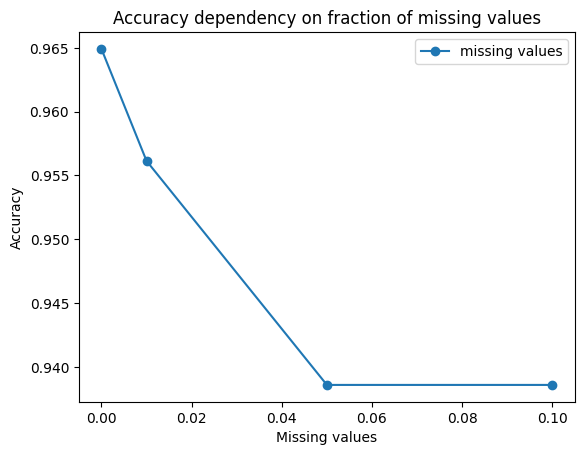

In [274]:
plt.plot(missing_coefs, scores, marker="o", label="missing values")

plt.title("Accuracy dependency on fraction of missing values")
plt.xlabel("Missing values")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Data imputation

In [275]:
scores_imputation = []

for X, coef in zip(datasets, missing_coefs):
    
    imputer = KNNImputer(n_neighbors=2)
    new_X = imputer.fit_transform(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=4)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    scores_imputation.append(score)

    print(f"For model with {coef*100}% missing data, the score after imputation is:\t\t{round(score*100, 2)*1}%")

For model with 0% missing data, the score after imputation is:		93.86%
For model with 1.0% missing data, the score after imputation is:		96.49%
For model with 5.0% missing data, the score after imputation is:		95.61%
For model with 10.0% missing data, the score after imputation is:		92.98%


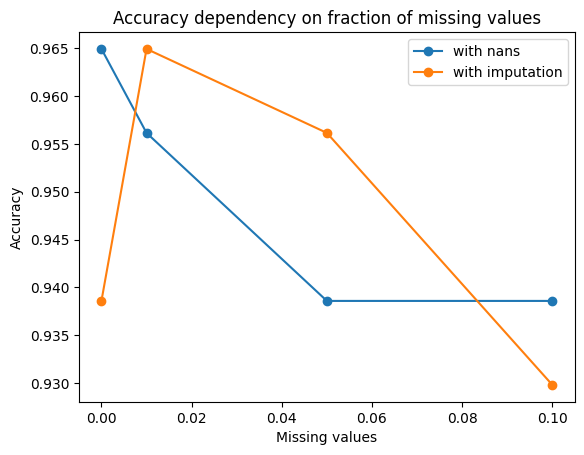

In [276]:
plt.plot(missing_coefs, scores, marker="o", label="with nans")
plt.plot(missing_coefs, scores_imputation, marker="o", label="with imputation")

plt.title("Accuracy dependency on fraction of missing values")
plt.xlabel("Missing values")
plt.ylabel("Accuracy")
plt.legend()

plt.show()